C:\Users\Admin\AppData\Local\Temp\ipykernel_21084\3589390570.py:13: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  sales['Date'] = pd.to_datetime(sales['Date'])


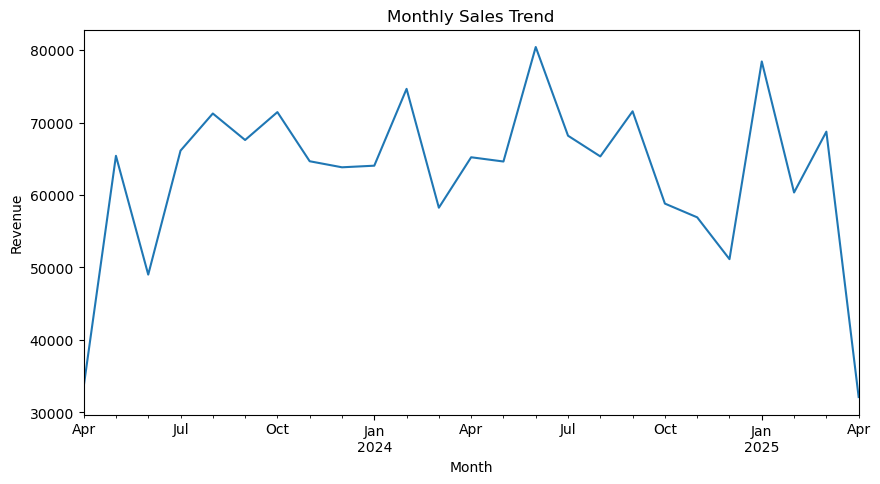

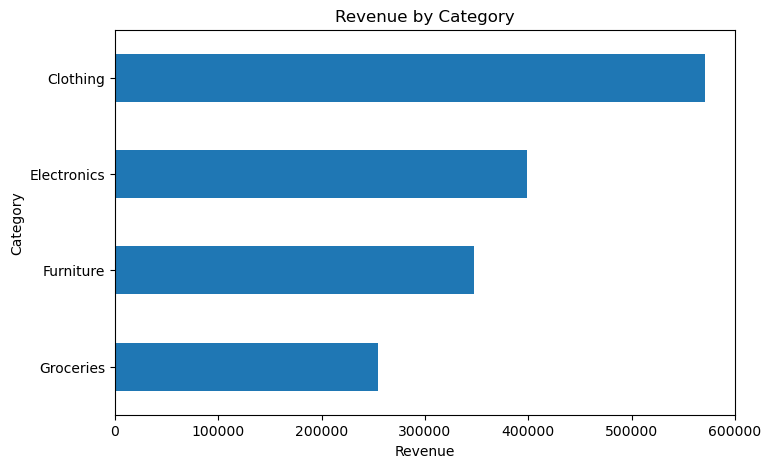

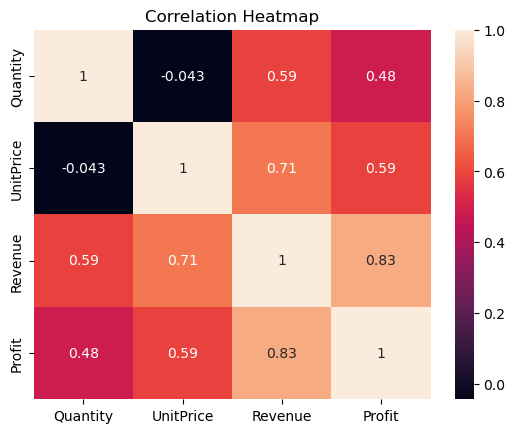

In [1]:
# EDA Analysis for Retail Dashboard

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load sales data
sales = pd.read_csv('C:/Users/Admin/Downloads/sales_data (1).csv')
products = pd.read_csv('C:/Users/Admin/Downloads/products_data (1).csv')
stores = pd.read_csv('C:/Users/Admin/Downloads/stores_data (1).csv')

# Merge for context
sales['Date'] = pd.to_datetime(sales['Date'])
sales['Month'] = sales['Date'].dt.to_period('M')
merged = sales.merge(products, on='ProductID').merge(stores, on='StoreID')

# Monthly Sales Trend
monthly_sales = merged.groupby('Month')['Revenue'].sum()
monthly_sales.plot(title='Monthly Sales Trend', figsize=(10,5))
plt.ylabel("Revenue")
plt.show()

# Category-wise Revenue
cat_rev = merged.groupby('Category')['Revenue'].sum().sort_values()
cat_rev.plot(kind='barh', title='Revenue by Category', figsize=(8,5))
plt.xlabel("Revenue")
plt.show()

# Correlation Heatmap
sns.heatmap(sales[['Quantity', 'UnitPrice', 'Revenue', 'Profit']].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


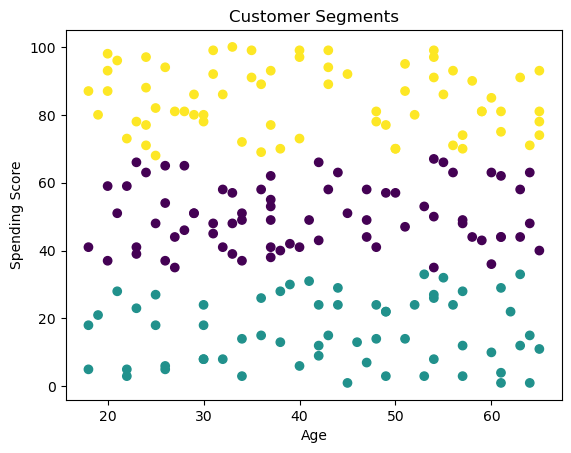

In [3]:
# Customer Segmentation with KMeans
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load customer data
customers = pd.read_csv('C:/Users/Admin/Downloads/customers_data_refreshed.csv')

# Features for clustering
X = customers[['Age', 'SpendingScore']]
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
customers['Segment'] = kmeans.labels_

# Save results
customers.to_csv("customer_segments.csv", index=False)

# Plot clusters
plt.scatter(X['Age'], X['SpendingScore'], c=customers['Segment'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title("Customer Segments")
plt.show()



In [4]:
# Churn Prediction with Logistic Regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load data
df = pd.read_csv('C:/Users/Admin/Downloads/customers_data_refreshed.csv')
X = df[['Age', 'SpendingScore']]
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

Confusion Matrix:
[[22 10]
 [22  7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.69      0.58        32
           1       0.41      0.24      0.30        29

    accuracy                           0.48        61
   macro avg       0.46      0.46      0.44        61
weighted avg       0.46      0.48      0.45        61

ROC AUC Score: 0.4644396551724138


In [6]:
!pip install pulp


   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.4 MB 8.5 MB/s eta 0:00:02
   --- ------------------------------------ 1.6/16.4 MB 4.4 MB/s eta 0:00:04
   ----- ---------------------------------- 2.4/16.4 MB 4.5 MB/s eta 0:00:04
   ------- -------------------------------- 2.9/16.4 MB 3.7 MB/s eta 0:00:04
   -------- ------------------------------- 3.4/16.4 MB 3.5 MB/s eta 0:00:04
   -------- ------------------------------- 3.7/16.4 MB 3.2 MB/s eta 0:00:04
   ---------- ----------------------------- 4.5/16.4 MB 3.2 MB/s eta 0:00:04
   ------------ --------------------------- 5.0/16.4 MB 3.1 MB/s eta 0:00:04
   ------------- -------------------------- 5.5/16.4 MB 3.1 MB/s eta 0:00:04
   -------------- ------------------------- 6.0/16.4 MB 3.0 MB/s eta 0:00:04
   ---------------- ----------------------- 6.6/16.4 MB 3.1 MB/s eta 0:00:04
   ----------------- ---------------------- 7.3/16.4 MB 3.0 MB/s eta 0:00:04
   ---

In [7]:

# Transportation Optimization using PuLP

import pandas as pd
from pulp import LpMinimize, LpProblem, LpVariable, lpSum

# Load data
df = pd.read_csv('C:/Users/Admin/Downloads/transportation_data.csv')

# Decision Variables
model = LpProblem("TransportationOptimization", LpMinimize)
x = {i: LpVariable(f"x_{i}", lowBound=0) for i in df.index}

# Objective: Minimize Total Cost
model += lpSum(df.loc[i, 'DistanceKM'] * df.loc[i, 'DeliveryCostPerKM'] * x[i] for i in df.index)

# Constraints: Capacity limits
for i in df.index:
    model += x[i] <= df.loc[i, 'MaxCapacity']

# Solve
model.solve()

# Output results
df['OptimizedUnits'] = [x[i].value() for i in df.index]
df.to_csv("transport_optimization_output.csv", index=False)
print(df[['StoreID', 'OptimizedUnits']])

   StoreID  OptimizedUnits
0        1             0.0
1        2             0.0
2        3             0.0
3        4             0.0
4        5             0.0
5        6             0.0
6        7             0.0
7        8             0.0
8        9             0.0
9       10             0.0
